<a href="https://colab.research.google.com/github/PrzemyslawCh/PyTorch_Course/blob/main/04_pytorch_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets MyNotes from course

We have used some datasets with PyTorch before.

But how do you get your won data into PyTorch.

One of the wauys to do so is via: custom datasets.

## Domain libraries

Depending on what you are working on, vison, text, audio, recommendation, you will want to look into each of the PyTroch domain libraries for esisting data loading functions and costumizable data loadind functions.



## 0. Importinng PyTorch and setting up device-agnostic code


In [ ]:
import torch
from torch import nn

# Note: Pytroch 1.10.0 + is for this course
torch.__version__

'1.13.1+cu116'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## 1. Get data

Our dataset is subset of the Food101 dataset.

Food101 starts 101 different classes of food and 100 images pres class(750 traiing, 250 testing)

Our dataset starts with classes of food and only 10% of the images (75 training, 25 testing)

Why do this?

When starting oyt ML projects its impornatn to try things on a small acale and thenincrease cale whe nneccesary .

The whole point is to speed up how dast you can experimen.



In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder does not exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, craeting one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
Unzipping pizza, steak and sushi data...


## 2. Becoming one with the data (data preparation and data exploration)



In [ ]:
import os
def walk_through_dir(dir_path):
  """Walk whrough dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directiories and {len(filenames)} images in '{dirpath}'.")


In [ ]:
walk_through_dir(image_path)

There are 2 directiories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directiories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directiories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directiories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directiories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directiories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directiories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directiories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directiories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

Lets write some code to:
1. Get all of the image apaths
2. Pick a random image path using Pythons random.choice()
3. Get the image class name using 'pathlib.Path.parent.stem'
4. Since we are working with images, lets open the image with pytoch PIL
5. We LL then show image and print matadata


data/pizza_steak_sushi/test/sushi/2715127.jpg
sushi
Random image Path: data/pizza_steak_sushi/test/sushi/2715127.jpg
Image class: sushi
Image height: 512


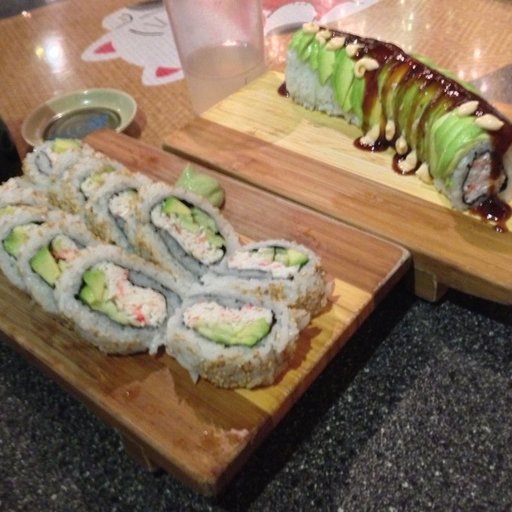

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image opaths
image_path_list = list(image_path.glob("*/*/*jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)
# 3. Get image class from path name (the image class is the name of the directory here the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print matadata
print(f"Random image Path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
img

(-0.5, 511.5, 511.5, -0.5)

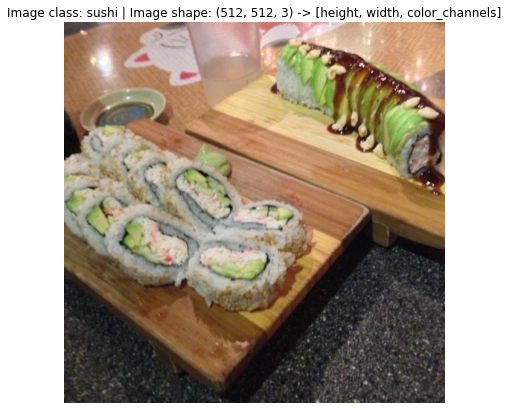

In [ ]:
# Try to visualize and image with matplotlib...
# Import matplotlib and numpy
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)


In [ ]:
img_as_array

array([[[ 83,  71,  73],
        [ 80,  68,  70],
        [ 80,  68,  70],
        ...,
        [135,  98,  69],
        [136, 100,  68],
        [138, 102,  70]],

       [[ 84,  72,  74],
        [ 79,  67,  69],
        [ 77,  65,  67],
        ...,
        [149, 113,  81],
        [149, 113,  81],
        [149, 113,  81]],

       [[ 82,  70,  70],
        [ 78,  66,  66],
        [ 74,  64,  63],
        ...,
        [161, 122,  91],
        [158, 119,  88],
        [155, 116,  85]],

       ...,

       [[ 34,  28,  28],
        [ 33,  27,  27],
        [ 38,  32,  32],
        ...,
        [ 60,  56,  57],
        [ 73,  69,  70],
        [ 94,  90,  91]],

       [[ 37,  31,  31],
        [ 35,  29,  29],
        [ 41,  35,  35],
        ...,
        [ 58,  54,  55],
        [ 68,  64,  65],
        [ 87,  83,  84]],

       [[ 42,  36,  36],
        [ 38,  32,  32],
        [ 47,  41,  41],
        ...,
        [ 56,  52,  53],
        [ 63,  59,  60],
        [ 81,  77,  78]]

## 3. Transforming data

Before we can use our image data with PyTorch
1. Trun your target data into tensors (in our case, numerical representaiton of our Images)
2. Turn it into a 'torch.utils.data.Dataset' and subsequently a 'torch.utils.data' we will cal the 'Dataset '

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 3.1 data with 'torchvision.transforms'

Transfors help you get you images ready to be used with a model/perform data augmentation-

In [ ]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our image to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly
    transforms.RandomHorizontalFlip(p=0.5),
    # Trun the image into a torch.Tensor
    transforms.ToTensor()
    ])

In [ ]:
data_transform(img)

tensor([[[0.6745, 0.7373, 0.7922,  ..., 0.3216, 0.3020, 0.2980],
         [0.7961, 0.8235, 0.8392,  ..., 0.4431, 0.3176, 0.2824],
         [0.8157, 0.8314, 0.8431,  ..., 0.5843, 0.5216, 0.4706],
         ...,
         [0.2510, 0.2235, 0.2392,  ..., 0.2118, 0.1843, 0.1686],
         [0.2588, 0.2392, 0.2275,  ..., 0.2118, 0.1647, 0.1608],
         [0.2196, 0.2314, 0.2196,  ..., 0.2000, 0.1922, 0.1804]],

        [[0.5059, 0.5647, 0.6078,  ..., 0.2902, 0.2745, 0.2667],
         [0.6039, 0.6235, 0.6392,  ..., 0.3686, 0.2667, 0.2431],
         [0.6157, 0.6235, 0.6392,  ..., 0.4314, 0.3843, 0.3569],
         ...,
         [0.2392, 0.2196, 0.2314,  ..., 0.2039, 0.1765, 0.1569],
         [0.2510, 0.2314, 0.2196,  ..., 0.2039, 0.1569, 0.1490],
         [0.1922, 0.2157, 0.2118,  ..., 0.1843, 0.1725, 0.1647]],

        [[0.3804, 0.4157, 0.4549,  ..., 0.2863, 0.2667, 0.2588],
         [0.4549, 0.4667, 0.4824,  ..., 0.3373, 0.2588, 0.2392],
         [0.4667, 0.4706, 0.4824,  ..., 0.3137, 0.2863, 0.

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

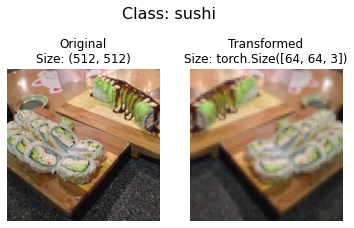

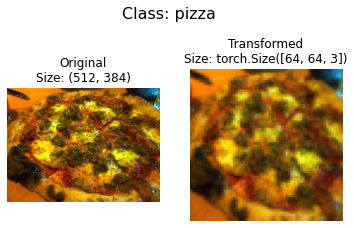

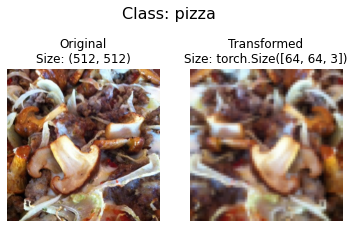

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  Selects random images from a path of images and loades/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # note we will need to change shape for matplotlib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)


## 4. Option 1: Loading Image data ImageFolder

We can load image classification data using 'torchvision.dataset.ImageFolder'

In [ ]:
# Use ImageFolder tor create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Chekc the length of our dataset
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Index on the train_data dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

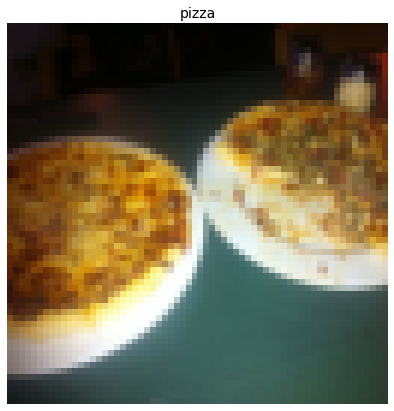

In [ ]:
# Rearange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shape
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)


### 4.1 Turn loaded images into ~DataLoader

A 'DataLoader' is going to help us turn our 'Dataset' into iterables and we can see batchsize images at a time.

In [ ]:
import os
os.cpu_count()

2

In [ ]:
# Turn train and test datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size =BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f7928faef10>,
 <torch.utils.data.dataloader.DataLoader at 0x7f78af7888b0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [barch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [barch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 5. option 2: Loading Image Data with a custom datset

1. Want to be able to load images from file
2. Want to be able to get class names from the datasets
3. Want to be able to get dictionary from the dataset

Pros:
* Can create a Dataset out of almost anything
* Not limited to PyTorch pre-build 'Dataset' functions

Cons:
* Even thougj you could create 'Dataset' out of almost anuthing, it does not mean it will wol
* Using a custom 'Dataset' often results in us writing more code, which coyuld be prone to erroes or performence issuses

All custom datasets in PyTorch often subclass

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

*italicized text*### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class names using "os.scandir()" to traverse a target directory (ideally the directory is in standdard image classification foramt)
2. Raise an error if the class names arent found (if this happens, there might be something worng iwth th directory structure)
3. Turn the class names into a dict and a lsit and return them.


In [ ]:
# Setup path for the target directory
target_directory = train_dir

print(f"Target dir: {target_directory}")

# Get the class from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the classes folder names in a target directory. """
  # 1. Get class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # Raise and error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldnt find any classes in {directory}... please check file structure.")

  # 3. create a dictionary of index labels (computers porefer numbers rather than strings as labels )
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

from prompt_toolkit.eventloop.defaults import create_event_loop
### 5.2 Create a custom 'Dataset' to prelicate 'ImageFolder'

To create our own custom dataset, we want to:

1. Subclass 'torch.utils.data.Dataset'
2. Init our subclass with a target directory (the directory) we would like to get data from as well as a transform id we woild klike to transform our data
3. Create several attributers:
  * paths = paths of our images
  * transforms = the transform we would like to use
  * classes = a lisr of the target classses
  * classe_to_idx - a list of the targer classes mapped to integer labels
4. Create ducntiuon to load_images(), this function will open an image
5. Ovrwrite the __len()__ method to return the length of our data
6. Overwritre__getitem()__ method to retunf a given sample when passed and index


In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)



In [ ]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])



In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f78af52fac0>,
 <__main__.ImageFolderCustom at 0x7f78af52fee0>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data), len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check for equality between original ImageFoldrr Dataset and ImageFolderCustomDataset
print(train_data.classes==train_data.classes)
print(test_data_custom.classes==test_data_custom.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a 'Dataset' and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand. tels cap the number of images to asee at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the targer dataset.
5. Setup a matplolib plot.
6. lOOP thoufgh the random sample indexes and plot the m with matplotlib.
7. Make sure the diemsnions of our images line up with matplotlib (HWC)

In [ ]:
# 1. Create a function to take a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, putpose, n should not be larget than 10, setting 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=10)

  # 5. Setup plot
  plt.figure(figsize=(16,8))

  # 6. Loop through radnom indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plottting
    targ_image_adjust = targ_image.permute(1, 2, 0)

    # PLot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)




ValueError: ignored

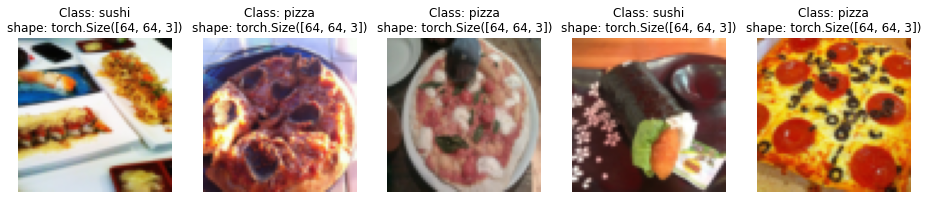

In [ ]:
# Display random images from the ImageFolder created aboce
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=42)


ValueError: ignored

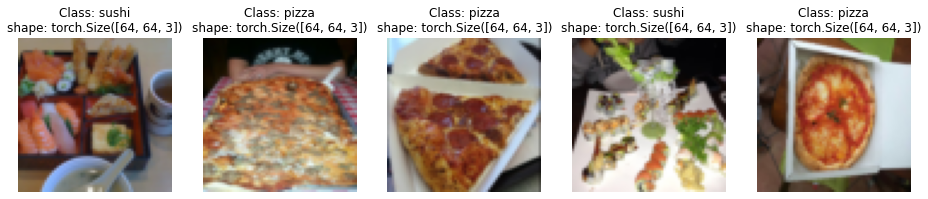

In [ ]:
# Display random images from the ImageFolder Custom Dataset
display_random_images(train_data_custom,
                       n=5,
                       classes=class_names,
                       seed=42)

 ### 5.4 Turn custom loaded images into 'Dataloader's


In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True
                                     )

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom



(<torch.utils.data.dataloader.DataLoader at 0x7f78af226c70>,
 <torch.utils.data.dataloader.DataLoader at 0x7f78af226eb0>)

In [ ]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out th shape
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 6. Other froms of transforms (data augmenttaion)

Data augmenttaion is the precess of artificially adding diversity to your training data.

IN the caase of image data this may mean applying various image trandormations to thr traininng images.

This practise hopefully results in a model tahts more generalizable to unseen data.

Lets take a look at one particular type of data augmentation used to train PyTotch vision models to state of the art levels...


In [ ]:
# Lets look at trivialAugment
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=5),
                                     transforms.ToTensor()])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/714866.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/930553.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/309892.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/540882.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg')]

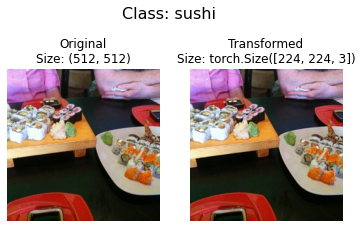

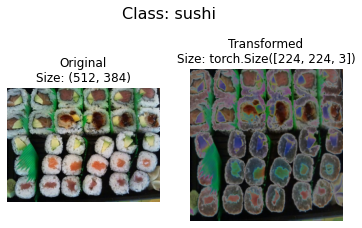

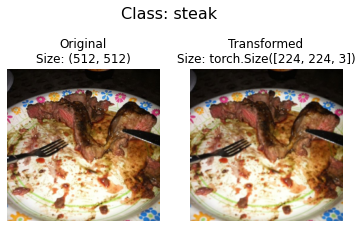

In [ ]:
# Plot random transformed images
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transform,
                        n=3,
                        seed=None)

## 7. Model 0: TinyVGG without data augmentation

Lets replicate TinyVGG architecture from the CNN explainrne

### 7.1 Creating transforms and loading dfata dor model 0


In [ ]:
# Create simple transform
simple_transform =transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
# 1. Loade and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root = train_dir,
                                        transform=simple_transform)

# 2. Trun the datasets into DataLoader

import os
from torch.utils.data import DataLoader

# Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader s
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


In [ ]:
NUM_WORKERS

2

### 7.2 Create TInyVGG model class


In [ ]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer:
  """
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:

    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
     ) # default stride value is same as kernel_size

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units *13*13,
                  out_features=output_shape)

    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self_conv_1(x))) # benefits from operator fushion

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test a model)

In [ ]:
# Get a single image batc h
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6316e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0999e-02,  1.2870e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7294e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4456e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7724e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5022e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8249e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

 ### 7.4 Use 'torchinfo' to get an idea of the shapes going though our model

In [ ]:
# Install torchinfo, import if tis availabel
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## 7.5 Create train and test loop fucntionns

* 'train_step()' - takes in a model and dataloader and trains the model on the data
* 'test_step()' - takes in a model dataloader and evaluates the model on th dataloader


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accurtacy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader barches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))


  # Adjsut metrics to get wvarege loss and accuracy per batc h
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc /len(dataloader)
  return test_loss, test_acc

### 7.6 Creating a 'train()' function to combine 'train_step()' and 'test_step()'

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### 7.7 Train and evaluate model 0

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1028 | train_acc: 0.2852 | test_loss: 1.0994 | test_acc: 0.2930
Epoch: 2 | train_loss: 1.1019 | train_acc: 0.2930 | test_loss: 1.0988 | test_acc: 0.2930
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.2656 | test_loss: 1.0959 | test_acc: 0.4492
Epoch: 4 | train_loss: 1.1053 | train_acc: 0.3008 | test_loss: 1.0925 | test_acc: 0.3086
Epoch: 5 | train_loss: 1.0963 | train_acc: 0.4297 | test_loss: 1.0993 | test_acc: 0.2930
Epoch: 6 | train_loss: 1.0971 | train_acc: 0.4141 | test_loss: 1.0995 | test_acc: 0.2930
Epoch: 7 | train_loss: 1.0994 | train_acc: 0.2930 | test_loss: 1.0998 | test_acc: 0.2930
Epoch: 8 | train_loss: 1.0936 | train_acc: 0.4141 | test_loss: 1.1018 | test_acc: 0.2930
Epoch: 9 | train_loss: 1.1070 | train_acc: 0.2930 | test_loss: 1.1043 | test_acc: 0.2930
Epoch: 10 | train_loss: 1.1012 | train_acc: 0.2930 | test_loss: 1.1004 | test_acc: 0.2930
Epoch: 11 | train_loss: 1.1003 | train_acc: 0.2930 | test_loss: 1.1002 | test_acc: 0.2930
Epoch: 12 | train_l

In [ ]:
model_0_results

{'train_loss': [1.1028273701667786,
  1.1018833369016647,
  1.0992273837327957,
  1.105317011475563,
  1.0962617844343185,
  1.097146898508072,
  1.0993751287460327,
  1.093612402677536,
  1.1069665998220444,
  1.101232960820198,
  1.100284919142723,
  1.1000512093305588,
  1.098723128437996,
  1.097799465060234,
  1.094089612364769,
  1.1036196649074554,
  1.0774775445461273,
  1.0542476251721382,
  1.014455907046795,
  0.8221635203808546],
 'train_acc': [0.28515625,
  0.29296875,
  0.265625,
  0.30078125,
  0.4296875,
  0.4140625,
  0.29296875,
  0.4140625,
  0.29296875,
  0.29296875,
  0.29296875,
  0.29296875,
  0.29296875,
  0.29296875,
  0.47265625,
  0.3046875,
  0.3046875,
  0.49609375,
  0.49609375,
  0.578125],
 'test_loss': [1.0994091928005219,
  1.0988452583551407,
  1.0959228575229645,
  1.0925103574991226,
  1.0992562025785446,
  1.0995333790779114,
  1.099816545844078,
  1.101829782128334,
  1.1042933762073517,
  1.1004045456647873,
  1.1002399623394012,
  1.099951118230

### 7.8 plot the loss curves of model 0

A **Loss curve** is a way of tracking your models progress over time


In [ ]:
# Get the model_0_results keys
model_0_results.keys()


dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup ap lot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2 ,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # PLOT the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


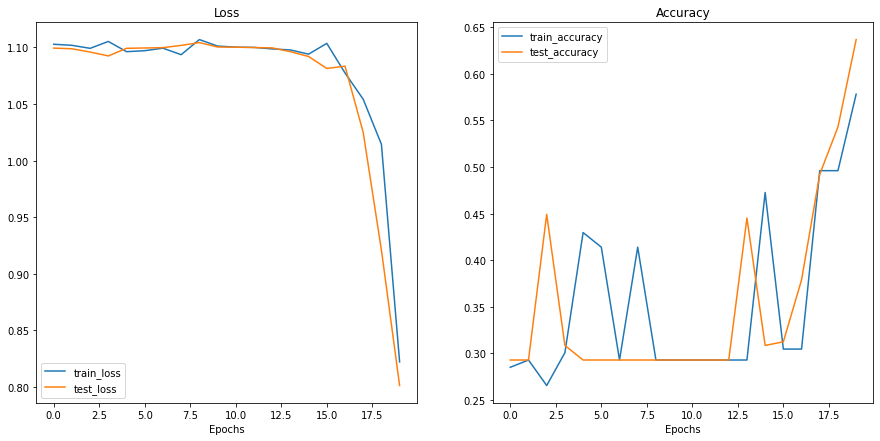

In [ ]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

A loss curve is one of the most helpful to troubleshoot a model.

## 9. Model 1: TinyVGG with data Augmentation

Noe lets try another another modellind experiment this time using the smae model as before with some data augmentation

### 9.1 Create transform with data augmentation


In [ ]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()


])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test 'Dataset' and 'DataLoaders' with data augmentation

In [ ]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [ ]:
# Turnour Datasets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloder_simple = DataLoader(dataset=test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,
                                   num_workers=NUM_WORKERS)

### 9.3 Conctruct and train model 1

this time we ll be using the same model architecture this time we have augmenbted the data



In [ ]:
# Create model_1 and sed it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1



TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3380, out_features=3, bias=True)
  )
)

Wonderful now we have a model and dataloaders lets create a loss function and optimizer and call upon our train() function to train and ecaluate our model

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Ser the number of epochs
NUM_EPOCHS = 20

# Setup loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model 1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and prinot out how long it took
end_time = timer()
print(f"Title training timne for model_1: {end_time-start_time:.3f} secodns ")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1005 | train_acc: 0.3320 | test_loss: 1.0991 | test_acc: 0.3047
Epoch: 2 | train_loss: 1.0843 | train_acc: 0.4258 | test_loss: 1.1060 | test_acc: 0.3047
Epoch: 3 | train_loss: 1.0742 | train_acc: 0.4258 | test_loss: 1.1093 | test_acc: 0.3047
Epoch: 4 | train_loss: 1.1116 | train_acc: 0.3047 | test_loss: 1.0960 | test_acc: 0.3047
Epoch: 5 | train_loss: 1.0768 | train_acc: 0.4766 | test_loss: 1.0876 | test_acc: 0.4492
Epoch: 6 | train_loss: 1.0846 | train_acc: 0.3750 | test_loss: 1.0813 | test_acc: 0.3320
Epoch: 7 | train_loss: 1.0622 | train_acc: 0.5000 | test_loss: 1.0539 | test_acc: 0.4297
Epoch: 8 | train_loss: 1.0405 | train_acc: 0.5352 | test_loss: 0.9983 | test_acc: 0.5664
Epoch: 9 | train_loss: 1.0745 | train_acc: 0.4062 | test_loss: 0.9183 | test_acc: 0.6875
Epoch: 10 | train_loss: 1.0357 | train_acc: 0.4453 | test_loss: 0.9476 | test_acc: 0.5430
Epoch: 11 | train_loss: 1.0330 | train_acc: 0.3711 | test_loss: 0.9709 | test_acc: 0.4375
Epoch: 12 | train_l

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
model_1_results

{'train_loss': [1.100477859377861,
  1.084319844841957,
  1.074205830693245,
  1.111624151468277,
  1.076830267906189,
  1.0845780819654465,
  1.0622058734297752,
  1.040524609386921,
  1.0745199248194695,
  1.0357061177492142,
  1.0329954400658607,
  0.9846360832452774,
  0.984192781150341,
  0.9458947852253914,
  0.9887269884347916,
  0.9598879963159561,
  0.9824865385890007,
  0.8713881075382233,
  0.8220416903495789,
  0.8558673933148384],
 'train_acc': [0.33203125,
  0.42578125,
  0.42578125,
  0.3046875,
  0.4765625,
  0.375,
  0.5,
  0.53515625,
  0.40625,
  0.4453125,
  0.37109375,
  0.546875,
  0.56640625,
  0.5390625,
  0.46875,
  0.58984375,
  0.4609375,
  0.62109375,
  0.62890625,
  0.640625],
 'test_loss': [1.099121555685997,
  1.1060064658522606,
  1.1093061938881874,
  1.0960034355521202,
  1.0875924825668335,
  1.081298477947712,
  1.0538816079497337,
  0.9982816129922867,
  0.9183154329657555,
  0.9475565031170845,
  0.9708843231201172,
  0.9244613796472549,
  0.823453

### 9.4 Plot the loss curves of model 1

A loss curve helps you evaluate your models performance overtime


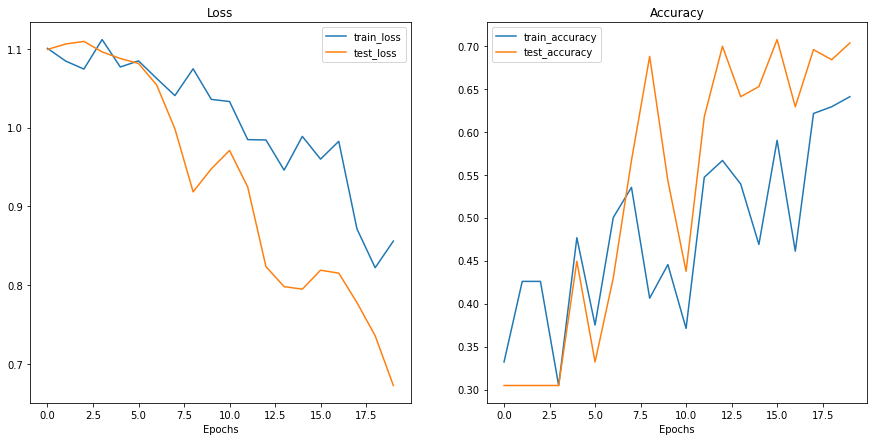

In [ ]:
plot_loss_curves(model_1_results)

## 10. Compare model results

After evaluating our modelling experiments on their own its importnatn to compare them to each other.

Theres a few different ways to do this:
1. Hard coding waht we are dictionary
2. PyTorch + Tensorboard
3. Weights and Biases
4. MLFLow


In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.102827,0.285156,1.099409,0.292969
1,1.101883,0.292969,1.098845,0.292969
2,1.099227,0.265625,1.095923,0.449219
3,1.105317,0.300781,1.092510,0.308594
4,1.096262,0.429688,1.099256,0.292969
5,1.097147,0.414062,1.099533,0.292969
6,1.099375,0.292969,1.099817,0.292969
7,1.093612,0.414062,1.101830,0.292969
8,1.106967,0.292969,1.104293,0.292969
9,1.101233,0.292969,1.100405,0.292969


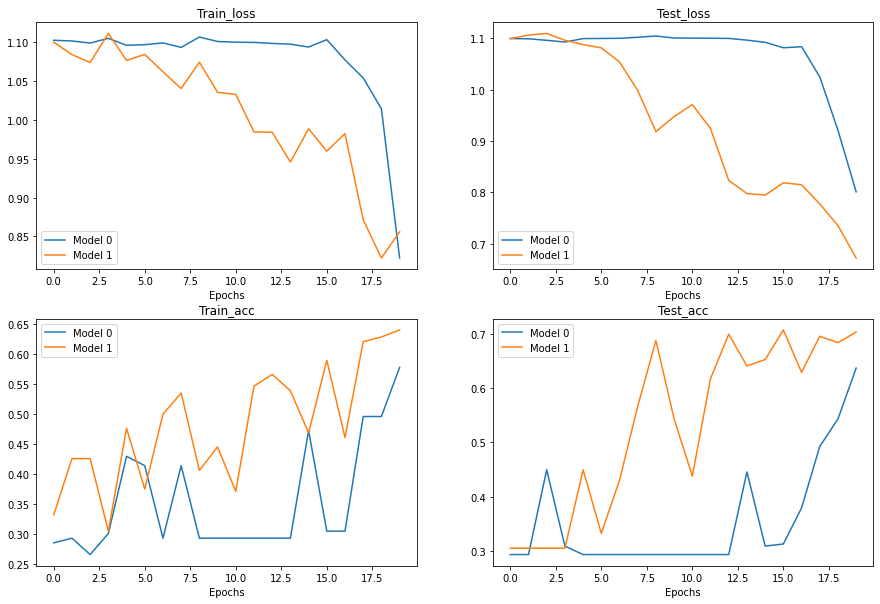

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2 , 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train_loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2 , 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test_loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2 , 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train_acc")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2 , 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test_acc")
plt.xlabel("Epochs")
plt.legend();


## 11. Making a predcition on a custom image

although we have trained a model on custom data how do you make prediction on a sample image not in eitheir training or testing  dataset

In [ ]:
# Download custom image
import requests

# SETUP custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Downoload the image if it deos not already exst
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from GitHUB, need to use the "raw " file linkl
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists , skipping download")

### 11.1 Loading in a custom image with PyTorch

We have to make sure our cutom image is in the same format as the data our model was trainde dsno
* in tensor form with datatype(float.32)
* of shape 64,64,3
* on the right device


In [ ]:
custom_image_path

PosixPath('data/04-pizza-dad.jpeg')

In [ ]:
import torchvision
# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

custom_image_uint8


tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

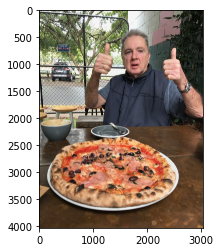

In [ ]:
plt.imshow(custom_image_uint8.permute(1 ,2 ,0));

In [ ]:
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image data

### 11.2 Making a predcition on a csutom image with a PyTorch model

RuntimeError: ignored

In [ ]:
# Load in the custom oimage and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image



tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

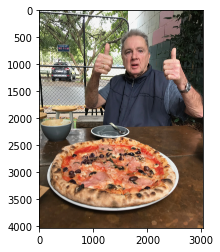

In [ ]:
plt.imshow(custom_image.permute(1, 2 ,0))

In [ ]:
# Try to make a prediciton on an image in uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image).to(device)

KeyboardInterrupt: ignored

In [ ]:
# Create transform pipeline to resize image
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")


Original shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


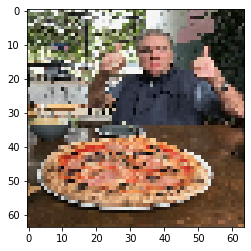

In [ ]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

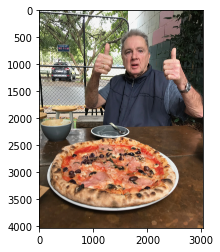

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0))

In [ ]:
# This will error: iamge not on right device
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed)

RuntimeError: ignored

In [ ]:
# This will erro becaouse batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed).to(device)

RuntimeError: ignored

In [ ]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
# This should work
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0)).to(device)

In [ ]:
custom_image_pred

tensor([[-0.3963, -0.7439, -0.8251]])

In [ ]:
class_names


['pizza', 'steak', 'sushi']

Note to make a prediction on custom image we had to
* Load the image and turn it into a tensor
* Make sure the image was the same shape datatype as the model torch.float32
* Make sure the image was the same shape as the data the model was train on (3, 64,64) with a batch size
(1, 3, 64,64)
* make sure the image was on the same device as our model


In [ ]:
 # Convert logits to prediction probabivbilitis
 custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
 custom_image_pred_probs

tensor([[0.4241, 0.2996, 0.2762]])

In [ ]:
# Convert prediction probabilitiers to prediction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim =1).cpu()
custom_image_pred_labels

tensor([0])

In [ ]:
class_names[custom_image_pred_labels]

'pizza'

### 11.3 Putting custom image prediciton toogether: building a function

Ideal outcome:

A fucntion where we pass an image path to and have our model predict on that image and plot the image
+ prediciton

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);



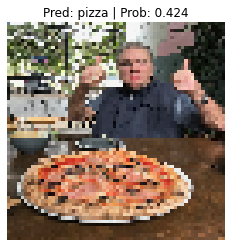

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)